In [5]:
import torch
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
from matplotlib.colors import Normalize
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colormaps 
from matplotlib.cm import ScalarMappable

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.set_default_dtype(torch.double)

from activephasemap.simulators import UVVisExperiment
pyplot_style ={"text.usetex": True,
               "text.latex.preamble": r"\usepackage{amsfonts}\usepackage[version=4]{mhchem}",
               "axes.spines.right" : False,
               "axes.spines.top" : False,
               "font.size": 22,
               "savefig.dpi": 600,
               "savefig.bbox": 'tight',
              } 

In [6]:
ITERATION = 14
design_space_bounds = [(0.0, 35.0), (0.0, 35.0)]
expt = UVVisExperiment(design_space_bounds, "../../data/")
expt.read_iter_data(ITERATION)
expt.generate(use_spline=True)

grid_data = np.load("../data/grid_data_10_%d.npz"%ITERATION)
comps = grid_data["comps"]
spectra = grid_data["spectra"][:,:,0]

Loading data from iteration 0 with shapes: (12, 2) (12, 101)
Loading data from iteration 1 with shapes: (6, 2) (6, 101)
Loading data from iteration 2 with shapes: (6, 2) (6, 101)
Loading data from iteration 3 with shapes: (6, 2) (6, 101)
Loading data from iteration 4 with shapes: (6, 2) (6, 101)
Loading data from iteration 5 with shapes: (6, 2) (6, 101)
Loading data from iteration 6 with shapes: (6, 2) (6, 101)
Loading data from iteration 7 with shapes: (6, 2) (6, 101)
Loading data from iteration 8 with shapes: (6, 2) (6, 101)
Loading data from iteration 9 with shapes: (6, 2) (6, 101)
Loading data from iteration 10 with shapes: (6, 2) (6, 101)
Loading data from iteration 11 with shapes: (6, 2) (6, 101)
Loading data from iteration 12 with shapes: (6, 2) (6, 101)
Loading data from iteration 13 with shapes: (6, 2) (6, 101)


In [9]:
fitted_params = np.ones((comps.shape[0], 6))
param_names =  ["label", "em_sphere", "ar_mu", "ar_sig", "em_rod", "w"]
parameters_bounds = [(0, 2), #label
                     (1.0, 10), # dieletric constant for sphereical medium
                     (1.1, 5.0), # nanorod aspect ratio (mu)
                     (0.001, 0.4), # nanorod aspect ratio (sigma)
                     (1.0, 10.0), # dieletric constant for nanorod medium
                     (0.0, 1.0), # mixed model weights
                     ]
for i in range(comps.shape[0]):
    try:
        result = np.load("./results_grid_v2/res_%d.npz"%i)
        fitted_params[i, 0] = result["feats"]
        fitted_params[i, 1:] = result["best_X"]
    except FileNotFoundError:
        fitted_params[i, :] = np.array([0, 1.33, 1.0, 0.0, 1.0, 1.0])
        

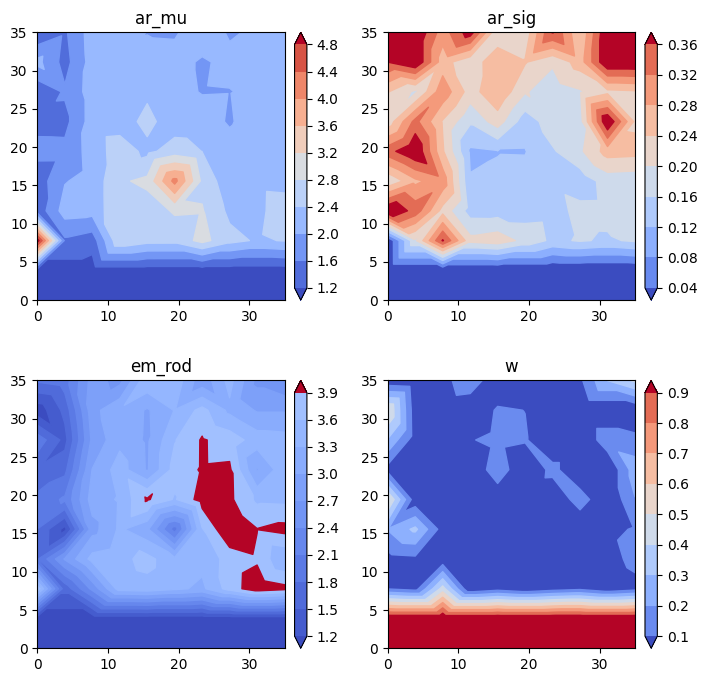

In [15]:
param_indices = [2, 3, 4, 5]
fig, axs = plt.subplots(2,2, figsize=(2*4, 2*4))
fig.subplots_adjust(wspace=0.3, hspace=0.3)
axs = axs.flatten()
for i, ax in enumerate(axs):
        param_id = param_indices[i]
        norm = Normalize(vmin = parameters_bounds[param_id][0], 
                         vmax = parameters_bounds[param_id][1]) 
        cmap = "coolwarm"
        param_values = fitted_params[:, param_id]
        mappable = ax.tricontourf(comps[:,0], 
                                comps[:,1],
                                param_values,
                                levels=10,
                                extend='both',
                                alpha=1.0,
                                antialiased=True,
                                cmap=cmap,
                                norm = norm
                )
        mappable.set_edgecolor("face")
        divider = make_axes_locatable(ax)
        cax = divider.append_axes('right', size='5%', pad=0.1)
        cbar = fig.colorbar(mappable, cax=cax)
        ax.set_title(param_names[param_id])
        ax.set_xlim([expt.bounds[0,0], expt.bounds[1,0]])
        ax.set_ylim([expt.bounds[0,1], expt.bounds[1,1]])
plt.show()